# WeatherPy
----

### Observations

   1) Firstly, we can see within the latitude versus temperature plot that higher max temperatures are centralized towards the center at 0 latitude (the equator). This goes hand-in-hand with our guess that it is warmer near the equator.
   
   2) Secondly, within our latitude versus humidity plot, we see a higher average of humidity percentage near the equator; humidity makes it difficult for heat to transfer away via evaporation. This makes it feel warmer.
   
   3) Lastly, on our latitude versus cloudiness plot, we see a lesser concentration of 0% cloudiness near the equator. Clouds are formed with water vapours rising by heat.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "https://api.openweathermap.org/data/2.5/weather?"
print('''Begin Data Retrieval
-----------------------------''')
record = 1
setnum = 1
ct = []
cloud = []
country = []
dt = []
hum = []
lat =[]
lng = []
maxt = []
winsp = []
for citi in cities:
    if record != 51:
        response = requests.get(url,params={'q': citi, 'APPID':api_key, 'units': 'imperial'}).json()
        try:
            print(f"Processing Record {record} of Set {setnum} | {response['name']}")
            record += 1
            ct.append(citi)
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            dt.append(response['dt'])
            hum.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            maxt.append(response['main']['temp_max'])
            winsp.append(response['wind']['speed'])
        except:
            print('City not found. Skipping...')
    else:
        record = 1
        setnum += 1  

Begin Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Constitución
Processing Record 2 of Set 1 | Hermanus
Processing Record 3 of Set 1 | Atuona
Processing Record 4 of Set 1 | Sangar
Processing Record 5 of Set 1 | Broken Hill
Processing Record 6 of Set 1 | College
Processing Record 7 of Set 1 | Cabo San Lucas
Processing Record 8 of Set 1 | Vittoria
Processing Record 9 of Set 1 | Santa Cruz del Sur
Processing Record 10 of Set 1 | Kudahuvadhoo
Processing Record 11 of Set 1 | Yulara
Processing Record 12 of Set 1 | Ushuaia
City not found. Skipping...
Processing Record 13 of Set 1 | Rikitea
Processing Record 14 of Set 1 | Oistins
Processing Record 15 of Set 1 | Pevek
Processing Record 16 of Set 1 | Barrow
Processing Record 17 of Set 1 | Garden City
Processing Record 18 of Set 1 | Upington
Processing Record 19 of Set 1 | Finnsnes
Processing Record 20 of Set 1 | Porto-Novo
Processing Record 21 of Set 1 | Khatanga
Processing Record 22 of Set 1 | Saskylakh
Processing

Processing Record 37 of Set 4 | Tual
Processing Record 38 of Set 4 | Ta Khmau
Processing Record 39 of Set 4 | Baykit
Processing Record 40 of Set 4 | Quelimane
Processing Record 41 of Set 4 | Honiara
Processing Record 42 of Set 4 | Soverato Marina
Processing Record 43 of Set 4 | Makakilo City
Processing Record 44 of Set 4 | São João da Barra
Processing Record 45 of Set 4 | Muros
Processing Record 46 of Set 4 | Troitskoye
Processing Record 47 of Set 4 | Mlonggo
Processing Record 48 of Set 4 | Salaga
Processing Record 49 of Set 4 | Nioro
Processing Record 50 of Set 4 | Puerto Boyacá
Processing Record 1 of Set 5 | Sabha
Processing Record 2 of Set 5 | Ribeira Grande
Processing Record 3 of Set 5 | Thinadhoo
Processing Record 4 of Set 5 | Nanortalik
Processing Record 5 of Set 5 | Gravataí
Processing Record 6 of Set 5 | Torbay
Processing Record 7 of Set 5 | Avera
Processing Record 8 of Set 5 | Esna
Processing Record 9 of Set 5 | Jalu
Processing Record 10 of Set 5 | Ola
Processing Record 11 of 

Processing Record 22 of Set 8 | Padang
Processing Record 23 of Set 8 | Rawson
Processing Record 24 of Set 8 | Oranjestad
City not found. Skipping...
Processing Record 25 of Set 8 | Ginir
Processing Record 26 of Set 8 | Fomboni
Processing Record 27 of Set 8 | Mahon
Processing Record 28 of Set 8 | Bayan
Processing Record 29 of Set 8 | Antofagasta
Processing Record 30 of Set 8 | Cap Malheureux
Processing Record 31 of Set 8 | Surgut
Processing Record 32 of Set 8 | São Miguel do Araguaia
Processing Record 33 of Set 8 | Juradó
Processing Record 34 of Set 8 | Port Hardy
Processing Record 35 of Set 8 | Soroti
Processing Record 36 of Set 8 | General Pico
City not found. Skipping...
Processing Record 37 of Set 8 | Krutinka
Processing Record 38 of Set 8 | Ukiah
Processing Record 39 of Set 8 | Puerto Madryn
Processing Record 40 of Set 8 | Punta Cardon
Processing Record 41 of Set 8 | Daitari
City not found. Skipping...
Processing Record 42 of Set 8 | San Luis
Processing Record 43 of Set 8 | Akureyr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
wdf = pd.DataFrame({'City':ct,'Cloudiness':cloud,'Country':country,'Date':dt,'Humidity':hum,
                   'Lat':lat, 'Lng':lng, 'Max Temp':maxt, 'Wind Speed':winsp})
wdf.to_csv('output/data.csv')
wdf.head()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [ ]:
plt.scatter(wdf['Lat'],wdf['Max Temp'],edgecolor='black',alpha=0.75)
plt.title(f"City Latitude vs. Max Temperature ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output/lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

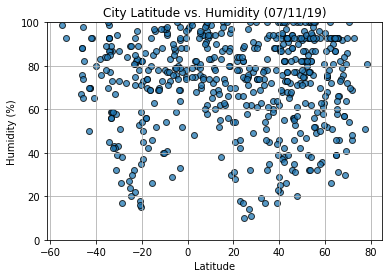

In [6]:
plt.scatter(wdf['Lat'],wdf['Humidity'],edgecolor='black',alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.ylim(0,100)
plt.savefig("output/lat_hum.png")
plt.show()

#### Latitude vs. Cloudiness Plot

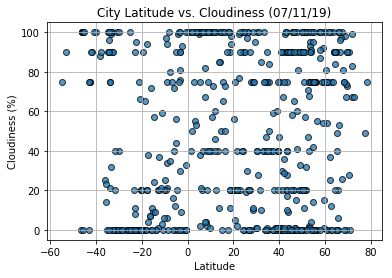

In [7]:
plt.scatter(wdf['Lat'],wdf['Cloudiness'],edgecolor='black',alpha=0.75)
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("output/lat_cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

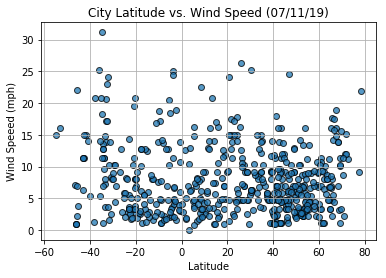

In [8]:
plt.scatter(wdf['Lat'],wdf['Wind Speed'],edgecolor='black',alpha=0.75)
plt.title(f"City Latitude vs. Wind Speed ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speeed (mph)')
plt.grid()
plt.savefig("output/lat_wind.png")
plt.show()